## Working with geospatial vector data in Python

In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
pd.options.display.max_rows = 10

#### read shapefile data directly from the zip file

In [3]:
df_parcels= gpd.read_file("zip://./data/parcel.zip")

#### display basic info about the dataframe

In [4]:
df_parcels.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 111367 entries, 0 to 111366
Data columns (total 18 columns):
OBJECTID      111367 non-null int64
PVANUM        111356 non-null object
NUM1          111308 non-null object
NUM2          1995 non-null object
DIR           5504 non-null object
NAME          111360 non-null object
TYPE          109212 non-null object
ADDRESS       111359 non-null object
UNIT          6631 non-null object
TAX           111016 non-null object
CLASS         111016 non-null object
PVA_ACRE      111367 non-null float64
CONDO         11085 non-null object
CAB_SLIDE     89313 non-null object
DATEENTRD     71863 non-null object
Shape_Leng    111367 non-null float64
Shape_Area    111367 non-null float64
geometry      111367 non-null object
dtypes: float64(3), int64(1), object(14)
memory usage: 15.3+ MB


#### get some basic info about the dataframe from .head
The 'geometry' column reveals the parcels are represented as polygons

In [5]:
df_parcels.head()

,OBJECTID,PVANUM,NUM1,NUM2,DIR,NAME,TYPE,ADDRESS,UNIT,TAX,CLASS,PVA_ACRE,CONDO,CAB_SLIDE,DATEENTRD,Shape_Leng,Shape_Area,geometry
0,1,None,327,None,None,CANE VIEW,TRL,327 CANE VIEW TRL,None,None,None,0.0,None,None,None,191.386306,1496.679371,POLYGON ((-84.56182518593556 38.08308923294327...
1,2,None,1821,None,None,ALYSHEBA,WAY,1821 ALYSHEBA WAY,None,None,None,0.0,None,R-815,2018-07-30,1133.907512,66200.655303,"POLYGON ((-84.42010040525781 38.0181823020032,..."
2,3,None,329,None,None,CANE VIEW,TRL,329 CANE VIEW TRL,None,None,None,0.0,None,None,None,202.614523,1923.338801,POLYGON ((-84.56176947038908 38.08314299222445...
3,4,None,335,None,None,CANE VIEW,TRL,335 CANE VIEW TRL,None,None,None,0.0,None,None,None,191.386306,1496.679371,"POLYGON ((-84.5615564425276 38.08291522963526,..."
4,5,None,343,None,None,CANE VIEW,TRL,343 CANE VIEW TRL,None,None,None,0.0,None,None,None,191.998970,1519.983396,"POLYGON ((-84.5611301992457 38.08277786937636,..."


#### the .plot() method produces a basic map of the data 

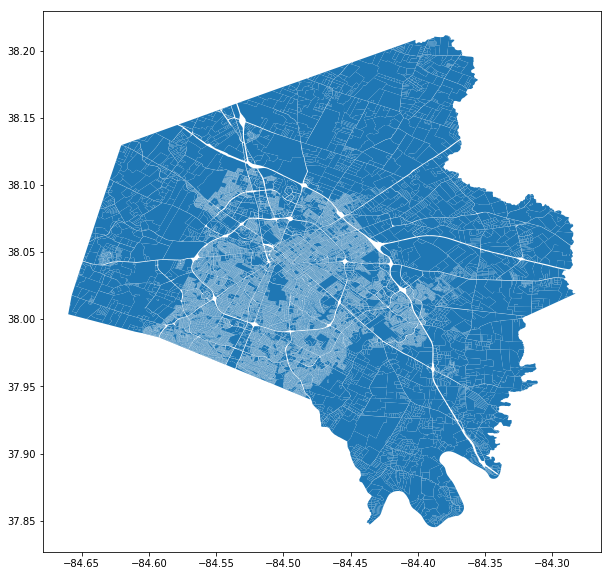

In [6]:
df_parcels.plot(figsize=(10,10));

In [7]:
df_parcels['TAX'].unique()

array([None, '01', '04', '06', '03', '05', '02', '07'], dtype=object)

There are some null records in the TAX column, fill-em with string 'ND'

In [8]:
df_parcels['TAX'].fillna(value='ND', inplace=True)
taxcodes=df_parcels['TAX'].unique()
taxcodes.sort()
print(taxcodes)

['01' '02' '03' '04' '05' '06' '07' 'ND']


__Add a little color__ using __cmap__ [more info here](https://matplotlib.org/gallery/color/colormap_reference.html)

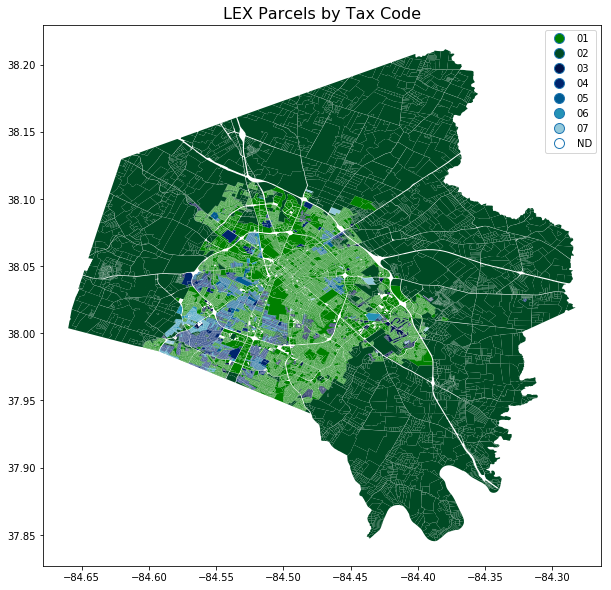

In [12]:
df_parcels.plot(column='TAX', figsize=(10,10), cmap='ocean', legend=True);
plt.title('LEX Parcels by Tax Code', fontdict={'fontsize': 16});
plt.savefig('images/LEX-parcels-tax-code.svg', format='svg');